# 1. Analisis Inicial 

## 1.Introducción. 


Los precios de las viviendas en algunas capitales australianas han aumentado recientemente hasta el punto de que algunos describen esto como una burbuja emergente, pero esta afirmación sigue sin ser comprobada oficialmente.


###  Objetivos

El ojetivo del trabajo para las asignatura de Machine Learning I  consistirá evaluar las diferetes técnicas de aprendzaje supervisado y no supervidado, para el cálculo del precio de las viviendas en el área de la ciudad de Melburne (Australia). 

La prioridad se basa  en no clasificar las casas caras (positivo) como baratas (negativo). 


Los datos fueron obtenidos de la página de Kaggle "https://www.kaggle.com/anthonypino/melbourne-housing-market". 



### 1.2 Control de cambios

Para la gestion del control de cambios se ha utilizado un repositorio git que puede encontrarse en https://github.com/InmaBorras/Machine-Learning-I". 

gh repo clone InmaBorras/Machine-Learning-I


## 2. Análisis Exploratorio Inicial (EDA) y Preparación de los datos 

Trás definir el objetivo de la práctica procedemos a hacer el analisis exploratorio de los datos , este trabajo ya lo relazamos en la práctica de Fundamentos de Datos, por lo que nos basaremos en el análisis previamente realizado. 


Para el proceso de limpieza de datos eliminamos los duplicados y procedimos a la detección  e imputacion de datos faltantes de datos faltantes.


In [1]:
import pandas as pd 
from pandas_profiling import ProfileReport
data = pd.read_csv('./CSV/Melbourne_housing_FULL.csv')
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

## 3. Seleccion de variables 


Nos basaremos igualmente en el análisis anterior  en el cual calculamos la variables que mas influian en el modelo siendo estas: 

    -Rooms            
    -Bathroom         
    -Distance         
    -Distancia_NEW    
    -Longtitude       
    -Landsize         
    -Location_TRA     
    -BathsAndRooms    
    -Lattitude        



## 4. Categorización del Precio


En primer luegar analizamos la distribución del precio. 



In [1]:
import pandas as pd
import seaborn as sns
import statistics as stat
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv("seleccion_variables_RF_bathandrooms.csv")

Analizamos la distribución del precio. 

In [11]:
precio=data[["Price"]]
print(precio.describe())
mediana= precio.median()
print("la mediana de" , mediana)
#moda=(stat.mode(precio)
moda=st.mode(precio)    
print("La moda de  Price" , moda)

              Price
count  2.705600e+04
mean   1.053621e+06
std    6.432746e+05
min    8.500000e+04
25%    6.400000e+05
50%    8.750000e+05
75%    1.300000e+06
max    1.120000e+07
la mediana de Price    875000.0
dtype: float64
La moda de  Price ModeResult(mode=array([[600000]]), count=array([[230]]))


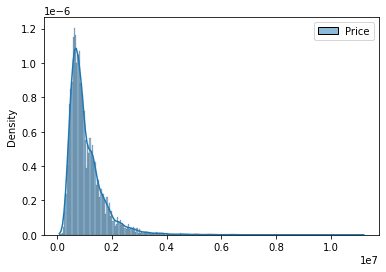

In [12]:
sns.histplot(data=precio, kde=True, stat='density')

La distribución del precio es bastante asimetrica hacia la derecha. Decidimos utiliza entonces la mediana para categorizar el precio  de forma binaria en "Caro" y "Barato" utilizando el punto de corte la mediana.Dandonos nos categorias bastante equilibradas.  


In [13]:
data.sort_values("Price")
mediana= 870000.0
precio_bajo= data[data["Price"]< mediana]
precio_alto= data[data["Price"]>= mediana]

In [14]:
print(len(precio_bajo))
print(len(precio_alto))

13381
13675


# 5.Division de los datos.  

Creación de la nueva categoría. 

In [9]:
import pandas as pd
import numpy as np
data= pd.read_csv("./CSV/seleccion_variables_RF_bathandrooms.csv")

#Etiquetarlos datos en funcion de alto o bajo. 

mediana= 870000.0
data["precio_div"]= np.where(data["Price"]>=mediana, "1", "0" )#1 es caro Y 0 es barato 
print(data.groupby('precio_div').size())

precio_div
0    13381
1    13675
dtype: int64


Creamos 3 subcobjuntos que  para realizar el entrenamiento ("Train"), la prueba de resultado del entrenamiento ("test") y la valicacion final del modelo ("validacion"). 

In [15]:
# dividir el data set de forma aleatoria 

p_train = 0.80 # Porcentaje de train.

data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, validation = data[data['is_train']==True], data[data['is_train']==False]
df = data.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(entrenamiento))
print("Ejemplos usados para test: ", len(validation))




Ejemplos usados para entrenar:  21608
Ejemplos usados para test:  5402


In [17]:
#Guardamos en un CSV los datos de entrenamiento y los de validacion. 
validation.to_csv('csv_precio_div_validation.csv')
train.to_csv('csv_precio_div.csv')

In [16]:
p_train = 0.70 # Porcentaje de train.

train['is_train'] = np.random.uniform(0, 1, len(train)) <= p_train
entrenamiento, test = train[train['is_train']==True], train[train['is_train']==False]
df = data.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(entrenamiento))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  15172
Ejemplos usados para test:  6482


<ipython-input-16-a50a4211140e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_train'] = np.random.uniform(0, 1, len(train)) <= p_train



```{toctree}
:hidden:
:titlesonly:


2-Aprendizaje-No-Super
3-Reduccion_dimensionalidad
4-Aprendizaje_supervisado
5_Aprendizaje_supervisado_2
6.Evaluacion_modelos
7.Curva_ROC
```
